# Objective:-
###            We want to create association rule for books

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend

In [4]:
book = pd.read_csv("book.csv")
book.head(3)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0


In [5]:
book.shape

(2000, 11)

In [6]:
frequent_itemsets = apriori(book, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [8]:
rules = association_rules(frequent_itemsets, metric = "lift",min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [10]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
99,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
94,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


### Rule for CookBooks

In [11]:
fname = 'CookBks'
rules_CookBks = (rules.lift > 1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_CookBks,['antecedents','consequents']]

,antecedents,consequents
2,(CookBks),(ChildBks)
12,(CookBks),(YouthBks)
20,(CookBks),(DoItYBks)
22,(CookBks),(RefBks)
24,(CookBks),(ArtBks)
26,(CookBks),(GeogBks)
28,(CookBks),(ItalCook)
40,"(CookBks, ChildBks)",(YouthBks)
41,"(CookBks, YouthBks)",(ChildBks)
43,(CookBks),"(ChildBks, YouthBks)"


### Rule for ChildBooks

In [12]:
fname = 'ChildBks'
rules_ChildBks = (rules.lift > 1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_ChildBks,["antecedents","consequents"]]

,antecedents,consequents
0,(ChildBks),(YouthBks)
3,(ChildBks),(CookBks)
4,(ChildBks),(DoItYBks)
7,(ChildBks),(RefBks)
9,(ChildBks),(ArtBks)
11,(ChildBks),(GeogBks)
40,"(CookBks, ChildBks)",(YouthBks)
42,"(ChildBks, YouthBks)",(CookBks)
44,(ChildBks),"(CookBks, YouthBks)"
46,"(CookBks, ChildBks)",(DoItYBks)


### Rule for YouthBks

In [14]:
fname = 'YouthBks'
rules_YouthBks = (rules.lift > 1) & (rules['antecedents'].astype(str).str.contains(fname)) | (rules['consequents'].astype(str).str.contains(fname))
rules.loc[rules_YouthBks,['antecedents','consequents']]

,antecedents,consequents
0,(ChildBks),(YouthBks)
1,(YouthBks),(ChildBks)
12,(CookBks),(YouthBks)
13,(YouthBks),(CookBks)
14,(YouthBks),(DoItYBks)
15,(DoItYBks),(YouthBks)
16,(ArtBks),(YouthBks)
17,(YouthBks),(ArtBks)
18,(GeogBks),(YouthBks)
19,(YouthBks),(GeogBks)


### Rule for RefBks

In [15]:
fname = 'RefBks'
rules_RefBks = (rules.lift > 1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_RefBks,["antecedents","consequents"]]

,antecedents,consequents
6,(RefBks),(ChildBks)
23,(RefBks),(CookBks)
30,(RefBks),(DoItYBks)
37,(RefBks),(GeogBks)
52,"(CookBks, RefBks)",(ChildBks)
54,"(RefBks, ChildBks)",(CookBks)
56,(RefBks),"(CookBks, ChildBks)"


### Rule for DoltYBks

In [16]:
fname = 'DoItYBks'
rules_DoItYBks = (rules.lift > 1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_DoItYBks,['antecedents','consequents']]

,antecedents,consequents
5,(DoItYBks),(ChildBks)
15,(DoItYBks),(YouthBks)
21,(DoItYBks),(CookBks)
31,(DoItYBks),(RefBks)
33,(DoItYBks),(ArtBks)
35,(DoItYBks),(GeogBks)
47,"(CookBks, DoItYBks)",(ChildBks)
48,"(ChildBks, DoItYBks)",(CookBks)
51,(DoItYBks),"(CookBks, ChildBks)"
71,"(GeogBks, DoItYBks)",(ChildBks)


### Rule for ArtBk

In [18]:
fname = 'ArtBks'
rules_ArtBks = (rules.lift > 1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_ArtBks,['antecedents','consequents']]

,antecedents,consequents
8,(ArtBks),(ChildBks)
16,(ArtBks),(YouthBks)
25,(ArtBks),(CookBks)
32,(ArtBks),(DoItYBks)
39,(ArtBks),(GeogBks)
58,"(CookBks, ArtBks)",(ChildBks)
60,"(ArtBks, ChildBks)",(CookBks)
62,(ArtBks),"(CookBks, ChildBks)"
76,"(GeogBks, ArtBks)",(ChildBks)
78,"(ArtBks, ChildBks)",(GeogBks)


### Rule for GeogBks

In [19]:
fname = 'GeogBks'
rules_GeogBks = (rules.lift > 1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_GeogBks,['antecedents','consequents']]

,antecedents,consequents
10,(GeogBks),(ChildBks)
18,(GeogBks),(YouthBks)
27,(GeogBks),(CookBks)
34,(GeogBks),(DoItYBks)
36,(GeogBks),(RefBks)
38,(GeogBks),(ArtBks)
64,"(CookBks, GeogBks)",(ChildBks)
66,"(GeogBks, ChildBks)",(CookBks)
68,(GeogBks),"(CookBks, ChildBks)"
70,"(GeogBks, ChildBks)",(DoItYBks)


### Rule for ItalCook

In [20]:
fname = 'ItalCook'
rules_ItalCook = (rules.lift > 1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_ItalCook,['antecedents','consequents']]

,antecedents,consequents
29,(ItalCook),(CookBks)


### Rule for ItalArt

In [24]:
fname = 'ItalArt'
rules_ItalArt = (rules.lift > 1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_ItalArt,['antecedents','consequents']]

,antecedents,consequents


### Rule for Florence

In [25]:
fname = 'Florence'
rules_Florence = (rules.lift > 1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_Florence,['antecedents','consequents']]

,antecedents,consequents


# Rule for ItalAtlas

In [26]:
fname = 'ItalAtlas'
rules_ItalAtlas = (rules.lift > 1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_ItalAtlas,['antecedents','consequents']]

,antecedents,consequents


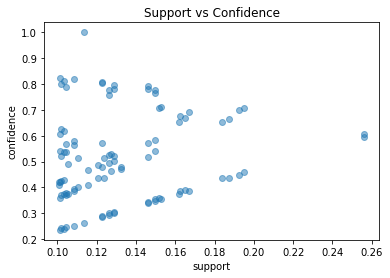

In [28]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'],alpha = 0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

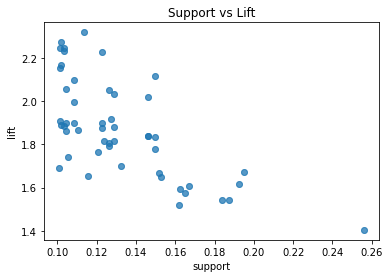

In [29]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

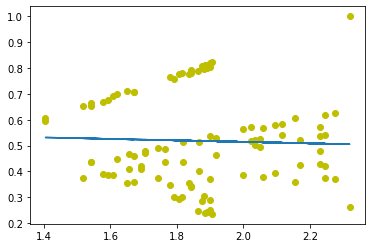

In [30]:
import numpy as np
fit = np.polyfit(rules['lift'], rules['confidence'],1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
        fit_fn(rules['lift']))

# Conclusion:-
###            We have make the rules for books association we can use first 5 high lift rules as a pailate and observe the result.

In [33]:
movies = pd.read_csv("my_movies.csv")

In [34]:
movies.head(3)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0


In [35]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [36]:
df=movies.iloc[:,5:16]

In [38]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [39]:
rules3 = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
233,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(Sixth Sense),"(Green Mile, LOTR2, Harry Potter1, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
235,(Green Mile),"(LOTR1, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
236,(Harry Potter1),"(Green Mile, LOTR1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [40]:
rules3.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
161,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
201,"(LOTR2, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
184,"(Green Mile, LOTR2)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
174,"(Sixth Sense, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
98,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
125,"(Green Mile, Sixth Sense, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
175,"(LOTR2, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
95,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
128,"(Green Mile, Gladiator)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
203,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [41]:
rules3[rules3['lift'] > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
233,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(Sixth Sense),"(Green Mile, LOTR2, Harry Potter1, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
235,(Green Mile),"(LOTR1, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
236,(Harry Potter1),"(Green Mile, LOTR1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


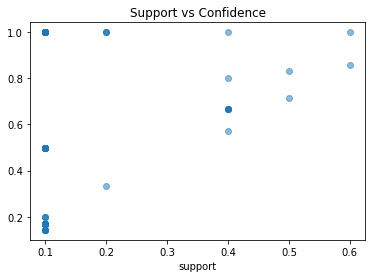

In [42]:
import matplotlib.pyplot as plt
plt.scatter(rules3['support'], rules3['confidence'],alpha=0.5)
plt.xlabel('support')
plt.title('confidence')
plt.title('Support vs Confidence')
plt.show()

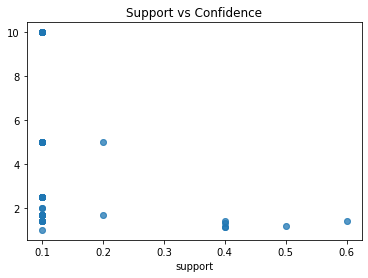

In [43]:
import matplotlib.pyplot as plt
plt.scatter(rules3['support'], rules3['lift'],alpha=0.5)
plt.xlabel('support')
plt.title('confidence')
plt.title('Support vs Confidence')
plt.show()

# Conclusion:-
###             We have make the rules for movies association we can use this rules and observe the result.